In [1]:
import sys
import os
sys.path.append('/home/gamma/workspace/gammalib/area_eval')
sys.path.append('/home/gamma/workspace/gammalib/gammasim')
sys.path.append('/home/gamma/workspace/trapezoidal_shaper')

In [2]:
from configuration.model.config_model import load_config
from implementation.algorithm import TrapezoidalShaperAlg
from implementation.filt_param_handlers import read_trap_params


from gammasim import GammaSim

# TPS example

### Estimate scaling Factor 
Call gammasim with no noise data, only 1 peak

---

* [ ] eseguire il get_trigegr_threshold.py Dovrebbe aggiornare la config
* [ ] esegui il find_area_gain
* [ ] in teoria stessa altezza tra i primi due plot di plot_res. Devi assumere solo un picco per ogni waveform
* [ ] 


In [3]:
config_siml = "config_method2-dummy.json"

In [4]:
!python /home/gamma/workspace/trapezoidal_shaper/configuration/get_trigger_thresholds.py /home/gamma/workspace/notebooks/falco/trapezoid/$config_siml

Percorso configurazione: /home/gamma/workspace/notebooks/falco/trapezoid/config_method2-dummy.json
Valore th_dy: 4
Valore th_d2y: 0.2
/home/gamma/workspace/notebooks/falco/trapezoid/config_method2-dummy.json
STEP 1: Generating the number of peaks for each sample
start_time: 1732195991.449651
stop_time:  1732195991.449693, total time for this step = 0.00004292

STEP 2: Generating parameters for each peak
start_time: 1732195991.449702
stop_time:  1732195991.449935, total time for this step = 0.00023365

STEP 3: Generating signals for each peak
start_time: 1732195991.449947
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 6533.18it/s]
stop_time:  1732195991.452837, total time for this step = 0.00288939

STEP 4: Generating labels
start_time: 1732195991.452847
stop_time:  1732195991.452867, total time for this step = 0.00002003

STEP 5: Applying noise to dataset
start_time: 1732195991.452873
stop_time:  1732195991.452977, total time for this step = 0.00010347

TOTAL TIME 

In [5]:
config_trpz = f"/home/gamma/workspace/trapezoidal_shaper/configuration/config_tps_{config_siml}"
!cat $config_trpz

{
    "gammasim_cfg": "/home/gamma/workspace/notebooks/falco/trapezoid/config_method2-dummy.json",
    "time_filter": {
        "alpha_l": 0.002,
        "alpha_h": 0.9,
        "gain_k": 0.0001,
        "in_cond": [
            0.0
        ],
        "th_dy": 0.0004567054584117776,
        "th_d2y": 6.477188861586527e-06,
        "dev_ord_det": 1,
        "zero_cr_window": 10,
        "window_sz": 15
    },
    "trap_filter": {
        "m": 60,
        "l": 40,
        "ftd_s": 20,
        "ftd_e": 0,
        "int_w": 10
    }
}

In [6]:
# Carica la configurazione
cfg = load_config(config_trpz)
cfg

Config(gammasim_cfg='/home/gamma/workspace/notebooks/falco/trapezoid/config_method2-dummy.json', time_filter=TimeFilterParams(alpha_l=0.002, alpha_h=0.9, gain_k=0.0001, in_cond=[0.0], th_dy=0.0004567054584117776, th_d2y=6.477188861586527e-06, dev_ord_det=1, zero_cr_window=10, window_sz=15), trap_filter=TrapParams(m=60, l=40, ftd_s=20, ftd_e=0, int_w=10))

In [7]:
cfg.time_filter.zero_cr_window = 200
cfg.trap_filter.m =
cfg.trap_filter.l = 10
# cfg.trap_filter.ftd_s = 5
# cfg.trap_filter.int_w = 5
# cfg

In [8]:
# Istanzio il simulatore GammaSim
saturation = False
gammasim = GammaSim(config_siml)
gammasim.generate_dataset(saturation)

STEP 1: Generating the number of peaks for each sample
start_time: 1732195991.765284
stop_time:  1732195991.765435, total time for this step = 0.00015092

STEP 2: Generating parameters for each peak
start_time: 1732195991.765445
stop_time:  1732195991.765888, total time for this step = 0.00044274

STEP 3: Generating signals for each peak
start_time: 1732195991.765905


  0%|          | 0/1 [00:00<?, ?it/s]

stop_time:  1732195991.773060, total time for this step = 0.00715470

STEP 4: Generating labels
start_time: 1732195991.773082
stop_time:  1732195991.773117, total time for this step = 0.00003552

STEP 5: Applying noise to dataset
start_time: 1732195991.773126
stop_time:  1732195991.773357, total time for this step = 0.00023103

TOTAL TIME FOR GENERATE DATASET = 0.00808787

(1, 1000)


In [9]:
# Crea l'istanza dell'algoritmo e calcola i risultati
ds = gammasim.get_dataset()
M = gammasim.get_params()[0][0]['tau2']
sampling_time=gammasim.get_sampling_time()
alg = TrapezoidalShaperAlg(dataset=ds, config=cfg, sampling_time=sampling_time, M=M)

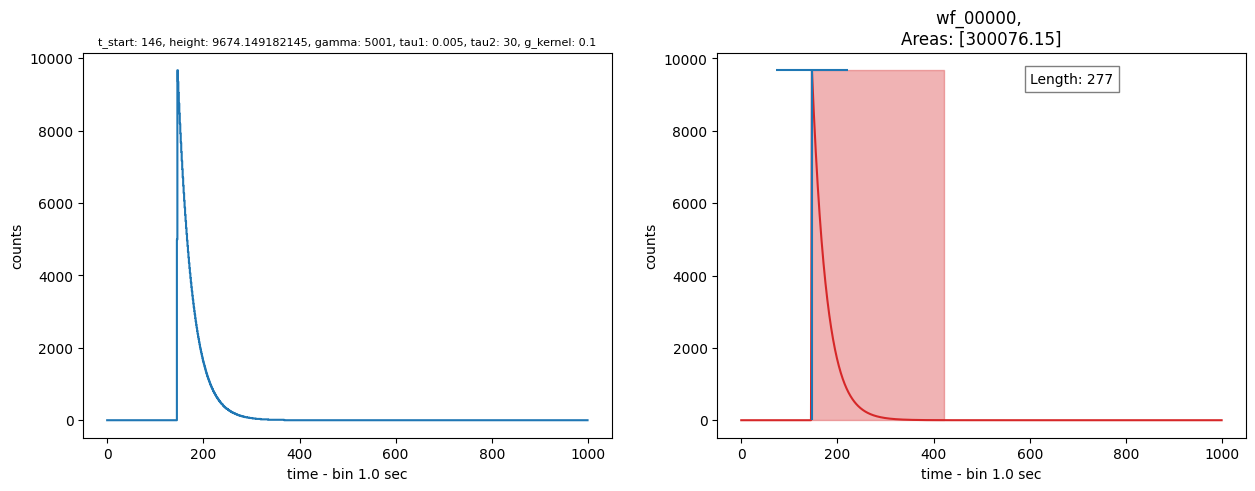

In [10]:
gammasim.plot_wf(0)

candidate_peaks:  (array([148]), {'peak_heights': array([0.00162122])})
t0 detected: :  [148]


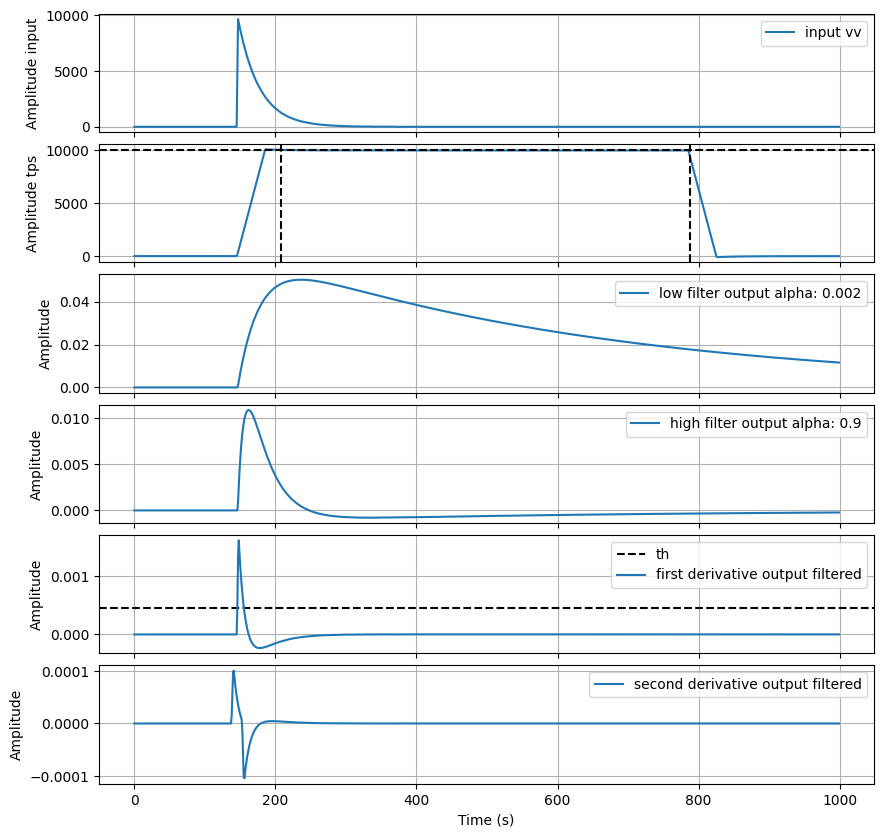

[10000.53429454023]

In [11]:
alg._compute(0, True)

candidate_peaks:  (array([148]), {'peak_heights': array([0.00162122])})
t0 detected: :  [148]


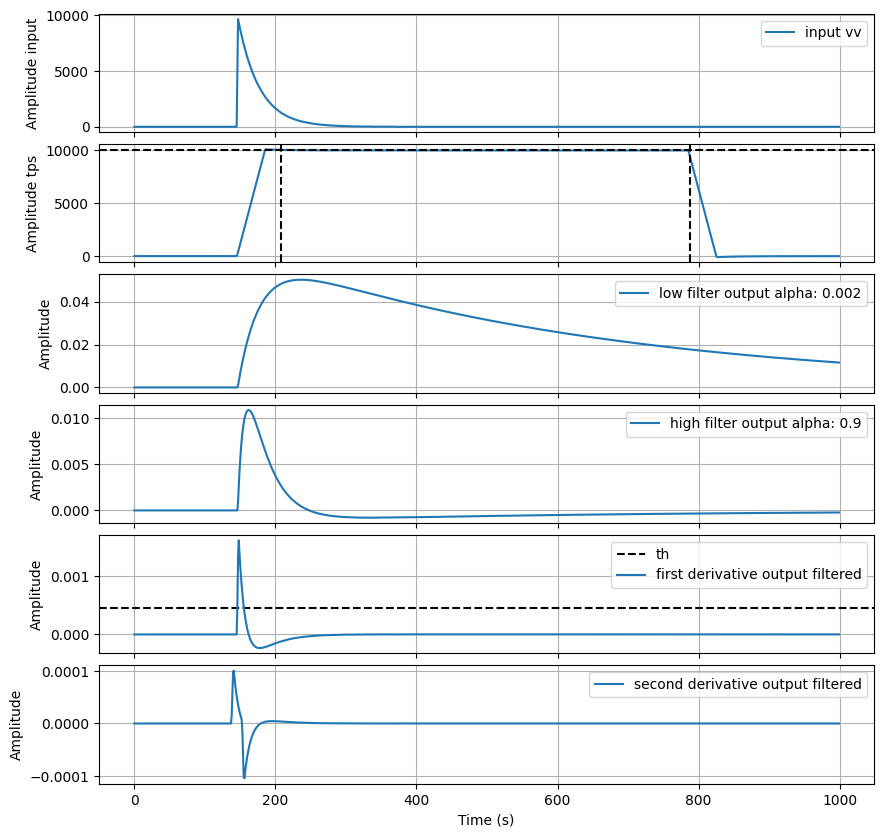

In [12]:
csv_file="notebook_values.cfg"
trap_heights = alg.find_area_gain(gammasim.get_heights(), out=csv_file)
# print(read_trap_params(csv_file))

In [13]:
def v(tt, l, tau, theta):
    return l/(tau-theta)(np.exp(-tt/tau))

In [14]:
heights = gammasim.get_heights()
heights

array([[9674.14918214]])

In [15]:
alg.trap_heights_data

array([list([10000.53429454023])], dtype=object)

visualize saved data

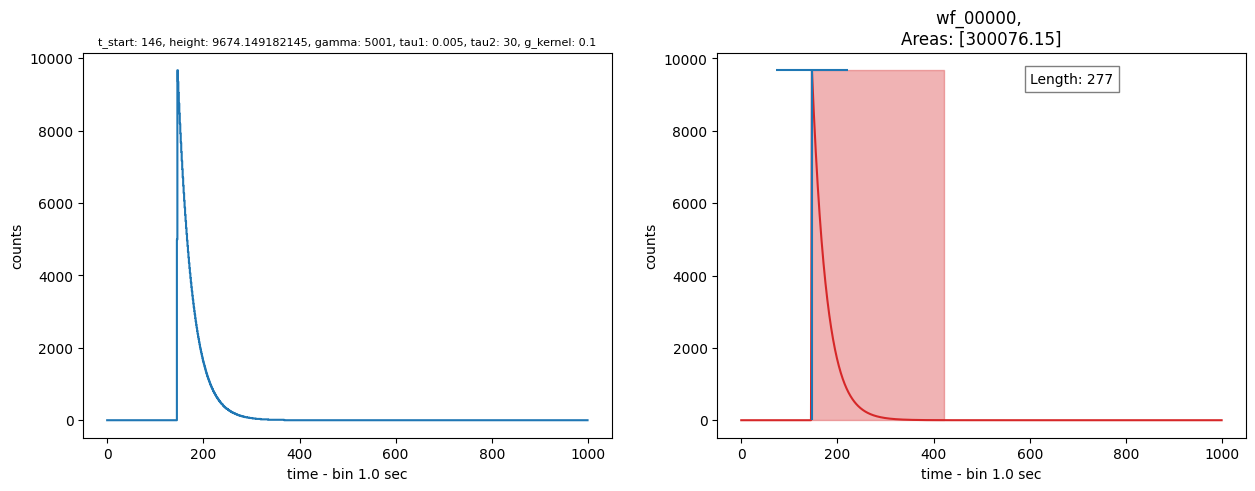

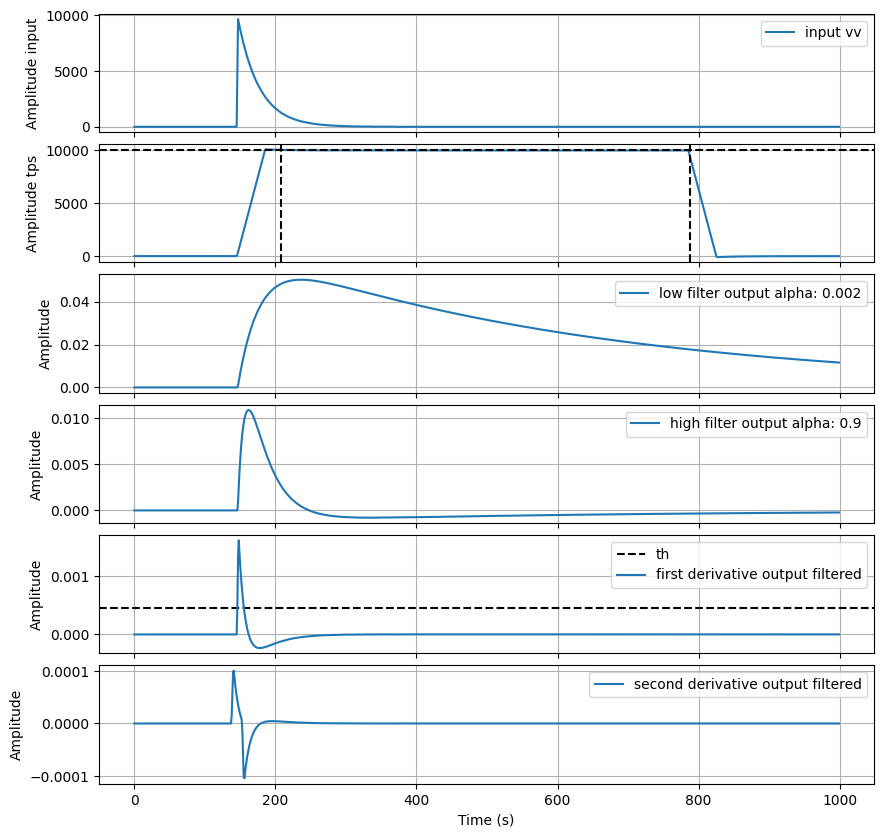

In [16]:
idx = 0
gammasim.plot_wf(idx)
alg.plot_results(idx)